# Importing Necessary Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Loading the dataset

In [2]:
data = pd.read_csv("SL dataset.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Performing Exploratory Data Analysis

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.shape

(25, 2)

In [8]:
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


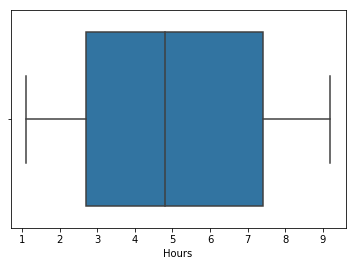

In [10]:
sns.boxplot(x=data['Hours'])

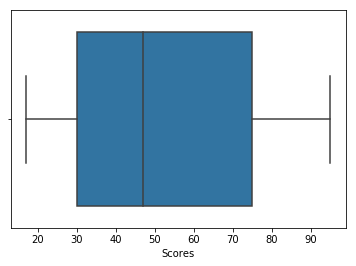

In [11]:
sns.boxplot(x=data['Scores'])

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


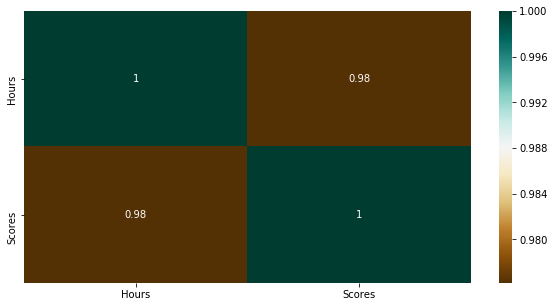

In [16]:
plt.figure(figsize=(10,5))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#sns.heatmap(c,cmap=”BrBG”,annot=True)
#c

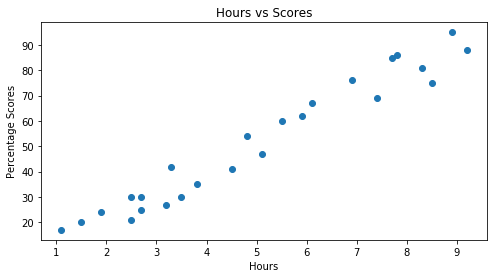

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(data['Hours'], data['Scores'])
ax.set_title('Hours vs Scores')
ax.set_xlabel('Hours')
ax.set_ylabel('Percentage Scores')
plt.show()

# Separating the values and applying train-test-split

In [35]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying Linear Regression 

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434683


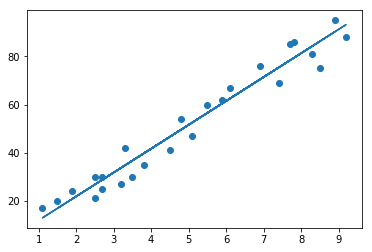

In [38]:
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [45]:
y_pred = regressor.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

result.head()
#accuracy = metrics.accuracy_score(y_test, y_pred)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5,1,'Actual vs Predicted')

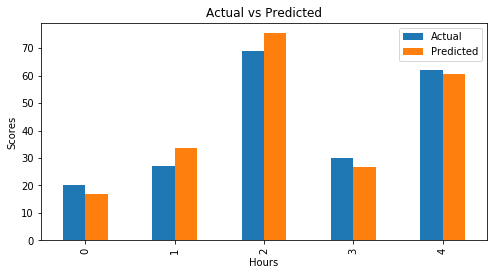

In [48]:
result.plot.bar(figsize=(8,4))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Actual vs Predicted")

# Evaluating the model

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Predicted score if a student study for 9.25 hrs in a day

In [57]:
given_hours = ([[9.25]])
percentage = regressor.predict(given_hours)

print(percentage)

[93.69173249]
